# CMB Shape Analysis and Location

This notebook enriches CMB metadata with shape and intensity features computed with radiomics

Then also inspects locations

In [49]:
import os
import sys
import argparse
import traceback


import logging
import numpy as np
import  ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cmbnet.utils.utils_plotting as utils_plotting

pd.set_option('display.max_column', None)
BRAIN_LABELS = set(
    [
        2,  # left cerebral white matter
        3,  # left cerebral cortex
        7,  # left cerebellum white matter
        8,  # left cerebellum cortex
        10,  # left thalamus
        11,  # left caudate
        12,  # left putamen
        13,  # left pallidum
        17,  # left hippocampus
        18,  # left amygdala
        26,  # left accumbens area
        28,  # left ventral DC (Diencephalon)
        41,  # right cerebral white matter
        42,  # right cerebral cortex
        46,  # right cerebellum white matter
        47,  # right cerebellum cortex
        49,  # right thalamus
        50,  # right caudate
        51,  # right putamen
        52,  # right pallidum
        53,  # right hippocampus
        54,  # right amygdala
        58,  # right accumbens area
        60,  # right ventral DC (Diencephalon)
    ]
)


In [50]:
all_meta_path = "../../data-misc/csv/CMB_metadata_all.csv"
csv_metadata_radiomics = "../../data-misc/csv/CMB_radiomics_metadata.csv"

In [51]:
df_cmb_metadata = pd.read_csv(all_meta_path)
df_cmb_metadata_radiomics = pd.read_csv(csv_metadata_radiomics)
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].apply(lambda x: list(ast.literal_eval(x)))
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].astype(str)
df_cmb_metadata['CM'] = df_cmb_metadata['CM'].astype(str)
df_cmb_metadata_radiomics.head(2)

/tmp/ipykernel_3118651/2459987675.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cmb_metadata = pd.read_csv(all_meta_path)


,seriesUID,CM,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00042-CMB-31,"[31, 142, 169]",0.484461,0.410174,2.705284,6.595453,7.071068,3.905125,7.28011,7.433034,38.213542,3.195240,0.764235,71.790785,1.878674,39.50,5151.023682,47499.623047,2.728894e+11,8.144715,26888.903564,2.101111,70125.070312,14185.036958,24414.676114,21874.318359,366.257568,69758.812744,11279.989864,29386.628478,0.441881,3.411117e+10,0.003705,2.674975e+08,"{0.0: 40044044, 3.0: 209, 24.0: 107}",24.0
1,RODEJA-00042-CMB-31,"[37, 183, 145]",0.753416,0.508102,2.211258,4.351997,4.716991,4.716991,5.09902,5.123475,14.031250,3.278864,0.629948,44.659159,3.182835,15.25,7026.095752,42926.772266,1.071508e+11,6.881557,20325.456055,2.536481,67903.054688,11666.154417,26144.913739,25408.271484,250.608276,67652.446411,8579.882629,29635.882352,0.187757,1.339385e+10,0.008600,1.947290e+08,"{0.0: 40044238, 2.0: 110, 3.0: 12}",2.0


In [52]:
df_radiomics = df_cmb_metadata_radiomics
df_radiomics = df_cmb_metadata.merge(df_cmb_metadata_radiomics, on=['seriesUID', 'CM'], how='inner')
df_radiomics.head(2)

,seriesUID,cmb_id,CM,size,radius,processed_id,RB_label,Location,Multiple,<5mm,Cause,Uncertain,Other,seq_type,res_level,field_strength,TE,subject,patientUID,Dataset,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00058-CMB-2,0,"[78, 95, 51]",30,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWI,high,1.5/3,NaN,00058,00058,RODEJA,0.410832,0.327655,1.139536,3.477858,4.031129,2.00000,4.031129,4.031129,3.062500,1.428817,0.723781,14.090535,4.600991,3.75,1229.358655,6729.115723,5.909592e+08,4.773557,3107.904755,3.890381,10877.576172,2046.086707,3614.341408,2615.416748,637.118408,10240.457764,1416.872709,4438.314859,1.213744,7.386990e+07,0.037778,6.635175e+06,"{0.0: 27613410, 7.0: 29, 8.0: 1}",7.0
1,RODEJA-00058-CMB-2,1,"[83, 72, 150]",64,2.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWI,high,1.5/3,NaN,00058,00058,RODEJA,0.563239,0.385547,1.470731,3.814664,4.123106,2.54951,4.123106,4.301163,7.276042,2.148568,0.756085,24.016522,3.300768,8.00,380.856476,6765.001807,1.176765e+09,5.812500,4384.813477,1.939050,9502.495117,2210.359214,3479.062860,3744.123291,69.665451,9432.829666,1796.964899,4288.001944,0.262638,1.470957e+08,0.018555,6.283082e+06,"{0.0: 27613376, 2.0: 40, 3.0: 24}",3.0


In [53]:
df_radiomics.groupby('Dataset').size()

Dataset
CRB       127
DOU        74
MOMENI    146
RODEJA    328
VALDO     248
dtype: int64

# Plots

In [54]:
for col in df_radiomics.columns:
    print(col)

seriesUID
cmb_id
CM
size
radius
processed_id
RB_label
Location
Multiple
<5mm
Cause
Uncertain
Other
seq_type
res_level
field_strength
TE
subject
patientUID
Dataset
shape_Elongation
shape_Flatness
shape_LeastAxisLength
shape_MajorAxisLength
shape_Maximum2DDiameterColumn
shape_Maximum2DDiameterRow
shape_Maximum2DDiameterSlice
shape_Maximum3DDiameter
shape_MeshVolume
shape_MinorAxisLength
shape_Sphericity
shape_SurfaceArea
shape_SurfaceVolumeRatio
shape_VoxelVolume
firstorder_10Percentile
firstorder_90Percentile
firstorder_Energy
firstorder_Entropy
firstorder_InterquartileRange
firstorder_Kurtosis
firstorder_Maximum
firstorder_MeanAbsoluteDeviation
firstorder_Mean
firstorder_Median
firstorder_Minimum
firstorder_Range
firstorder_RobustMeanAbsoluteDeviation
firstorder_RootMeanSquared
firstorder_Skewness
firstorder_TotalEnergy
firstorder_Uniformity
firstorder_Variance
count_dict
com_label


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

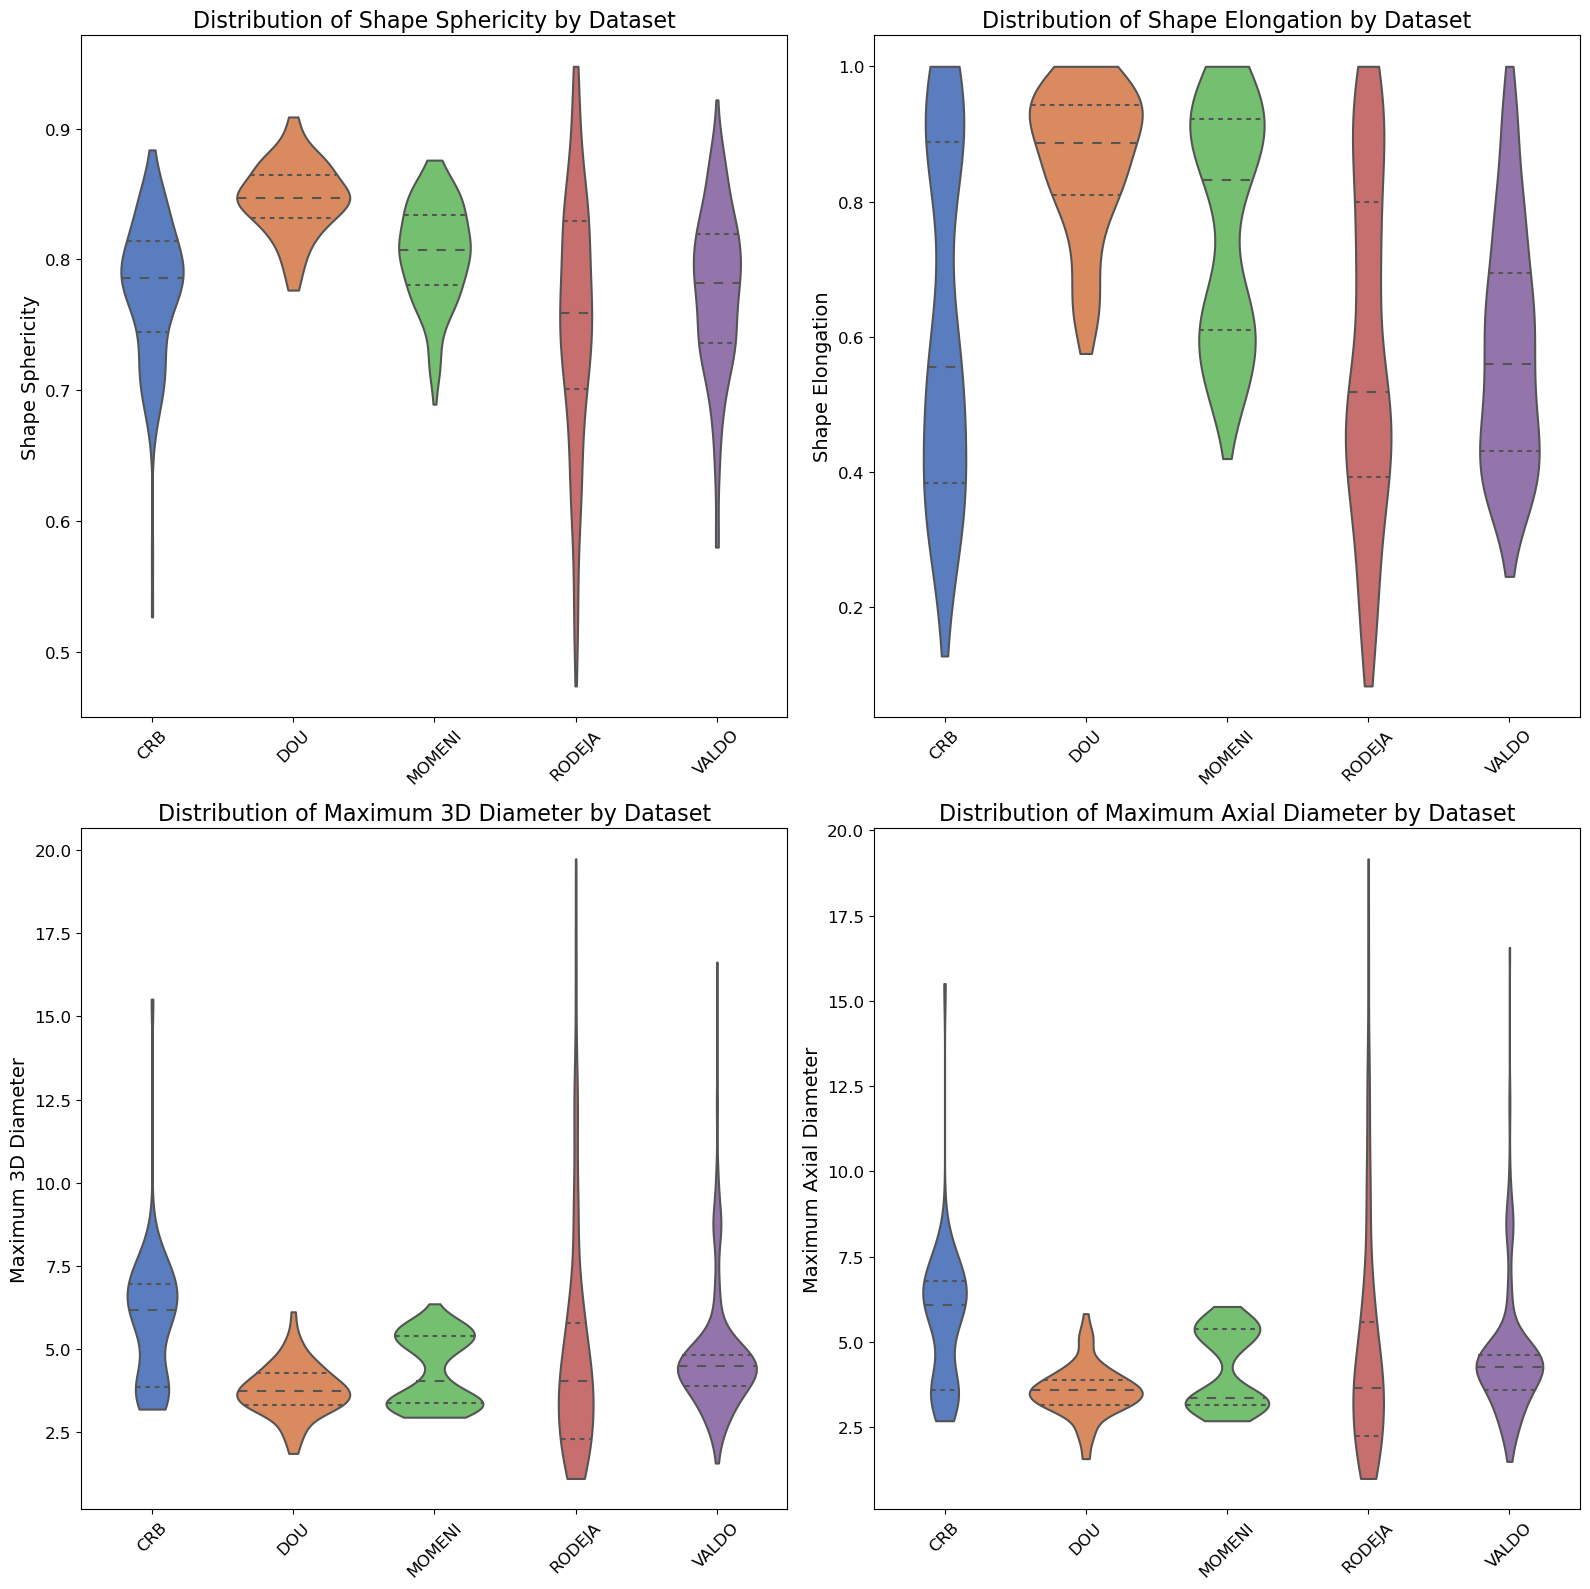

In [55]:
# Example usage
fig, axs = plt.subplots(2, 2, figsize=(16, 16))  # Increase the figure size for better visibility

# Plotting each feature
utils_plotting.create_violin_plot(
    ax=axs[0, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Distribution of Shape Sphericity by Dataset',
    xlabel='',
    ylabel='Shape Sphericity'
)

utils_plotting.create_violin_plot(
    ax=axs[0, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Elongation',
    group_by='Dataset',
    title='Distribution of Shape Elongation by Dataset',
    xlabel='',
    ylabel='Shape Elongation'
)

utils_plotting.create_violin_plot(
    ax=axs[1, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum3DDiameter',
    group_by='Dataset',
    title='Distribution of Maximum 3D Diameter by Dataset',
    xlabel='',
    ylabel='Maximum 3D Diameter'
)

utils_plotting.create_violin_plot(
    ax=axs[1, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterSlice',
    group_by='Dataset',
    title='Distribution of Maximum Axial Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Axial Diameter'
)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig("../../data-misc/img/radiomics_features_by_dataset.png")
plt.show()


# CMB location

In [56]:
# Function to read SynthSeg labels
def read_synthseg_labels(file_path):
    labels_dict = {}
    with open(file_path, "r") as file:
        # Skip header lines until we reach the line starting with 'labels'
        for line in file:
            if line.strip().lower().startswith("labels"):
                break

        # Process the label lines
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 2:
                label_num = int(parts[0])
                label_name = " ".join(parts[1:])
                labels_dict[label_num] = label_name
    return labels_dict

In [57]:
synth_labels  = read_synthseg_labels("/storage/evo1/jorge/SynthSeg/data/labels table.txt")
print(len(synth_labels))

33


In [58]:
df_location = df_radiomics[
    [
        "seriesUID",
        "cmb_id",
        "CM",
        "size",
        "radius",
        "processed_id",
        "RB_label",
        "Location",
        "Multiple",
        "<5mm",
        "Cause",
        "Uncertain",
        "Other",
        "seq_type",
        "res_level",
        "field_strength",
        "TE",
        "subject",
        "patientUID",
        "Dataset",
        "count_dict",
        "com_label",
    ]
]

In [59]:
def get_max_key(x: pd.Series):
    
    x = ast.literal_eval(x)
    
    # Check if there is any non-brain region
    x_filt = {k: v for k, v in x.items() if k in BRAIN_LABELS}
    if len(x_filt) > 0:
        x = x_filt
    if 0 in x and len(x) > 1:
        x.pop(0)
    
    # ignore the key with the value 0
    max_key = max(x, key=x.get) 
    return max_key

def get_percentages(x: pd.Series):
    
    x = ast.literal_eval(x)
    
    if len(x) > 1:
        x.pop(0)
    # get percentages of total
    total = sum(x.values())
    x = {k: v/total for k, v in x.items()}
    return x

def get_synthlabel_names(x: pd.Series, synth_labels):
    
    x = ast.literal_eval(x)
    x.pop(0)
    x = {synth_labels[int(k)]: v for k, v in x.items()} 
    return x

df_location['counts_names'] = df_location['count_dict'].apply(get_synthlabel_names, args=(synth_labels,))
df_location['percentages_name'] = df_location['count_dict'].apply(get_percentages)
df_location['max_key'] = df_location['count_dict'].apply(get_max_key)
df_location['label'] = df_location['max_key'].astype(int).apply(lambda x: synth_labels[x])



/tmp/ipykernel_3118651/2671064067.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location['counts_names'] = df_location['count_dict'].apply(get_synthlabel_names, args=(synth_labels,))
/tmp/ipykernel_3118651/2671064067.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location['percentages_name'] = df_location['count_dict'].apply(get_percentages)
/tmp/ipykernel_3118651/2671064067.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [60]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column width


df_location[['counts_names', 'count_dict', 'percentages_name', 'max_key']]

,counts_names,count_dict,percentages_name,max_key
0,"{'left cerebellum white matter': 29, 'left cerebellum cortex': 1}","{0.0: 27613410, 7.0: 29, 8.0: 1}","{7.0: 0.9666666666666667, 8.0: 0.03333333333333333}",7.0
1,"{'left cerebral white matter': 40, 'left cerebral cortex': 24}","{0.0: 27613376, 2.0: 40, 3.0: 24}","{2.0: 0.625, 3.0: 0.375}",2.0
2,"{'left cerebral white matter': 35, 'left cerebral cortex': 15}","{0.0: 35191155, 2.0: 35, 3.0: 15}","{2.0: 0.7, 3.0: 0.3}",2.0
3,"{'left cerebral white matter': 12, 'left cerebral cortex': 94}","{0.0: 35191099, 2.0: 12, 3.0: 94}","{2.0: 0.11320754716981132, 3.0: 0.8867924528301887}",3.0
4,"{'CSF': 23, 'right cerebellum white matter': 100, 'right cerebellum cortex': 234}","{0.0: 35190848, 24.0: 23, 46.0: 100, 47.0: 234}","{24.0: 0.06442577030812324, 46.0: 0.2801120448179272, 47.0: 0.6554621848739496}",47.0
...,...,...,...,...
918,"{'CSF': 36, 'right cerebral white matter': 2, 'right cerebral cortex': 149}","{0.0: 26008229, 24.0: 36, 41.0: 2, 42.0: 149}","{24.0: 0.1925133689839572, 41.0: 0.0106951871657754, 42.0: 0.7967914438502673}",42.0
919,"{'left cerebral cortex': 14, 'CSF': 72}","{0.0: 35268938, 3.0: 14, 24.0: 72}","{3.0: 0.16279069767441862, 24.0: 0.8372093023255814}",3.0
920,"{'left cerebral white matter': 33, 'left cerebral cortex': 81, 'left lateral ventricle': 11, 'left accumbens area': 18}","{0.0: 35268881, 2.0: 33, 3.0: 81, 4.0: 11, 26.0: 18}","{2.0: 0.23076923076923078, 3.0: 0.5664335664335665, 4.0: 0.07692307692307693, 26.0: 0.1258741258741259}",3.0
921,"{'CSF': 94, 'right cerebral cortex': 31}","{0.0: 35268899, 24.0: 94, 42.0: 31}","{24.0: 0.752, 42.0: 0.248}",42.0


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

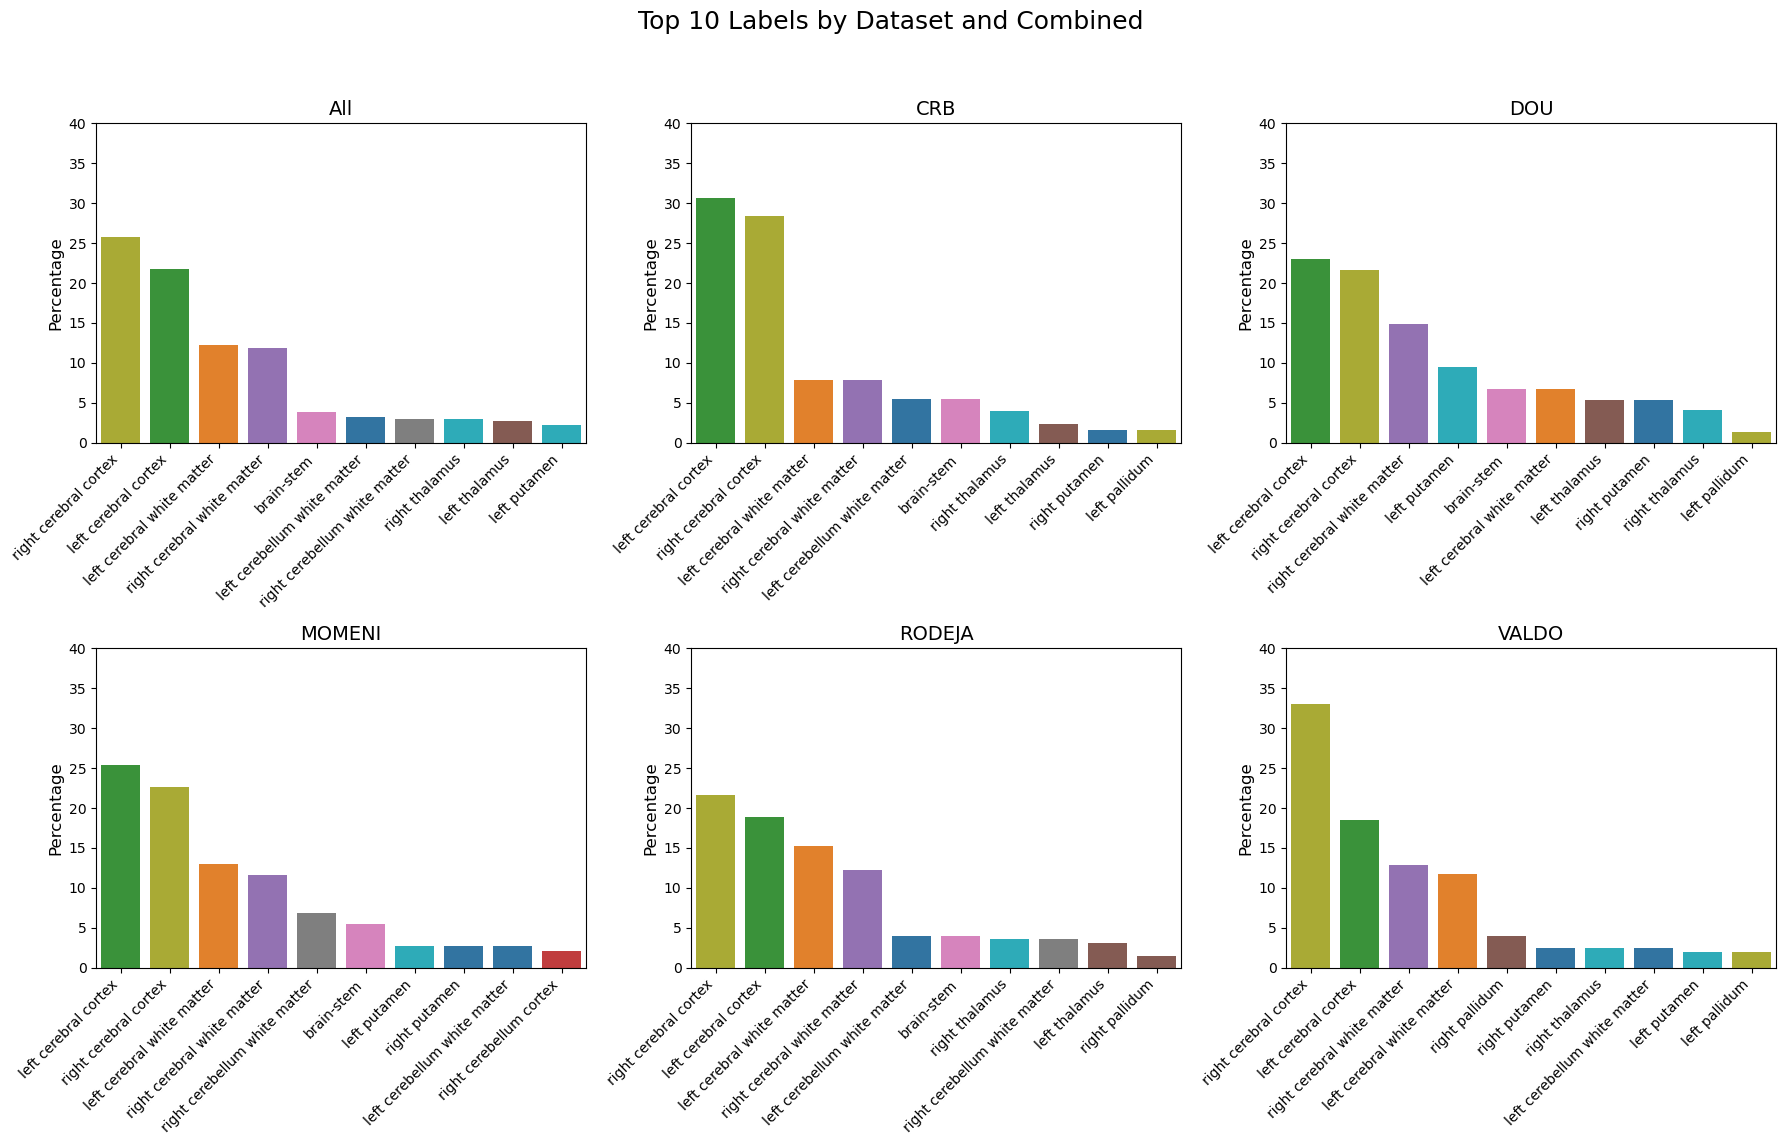

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_location is your original DataFrame
# You can add your data loading logic here

# Adding an 'All' category for aggregated data
df_location = pd.concat([df_location, pd.DataFrame({'label': df_location['label'], 'Dataset': 'All'})])

# Create a consistent color palette
unique_labels = df_location['label'].unique()
palette = sns.color_palette("tab10", len(unique_labels))  # A nicer color palette
color_mapping = dict(zip(unique_labels, palette))

# Sort datasets alphabetically, 'All' will be automatically last because of concatenation
datasets = sorted(df_location['Dataset'].unique())

# Plot setup
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust grid size for 6 plots
axs = axs.flatten()

for i, dataset in enumerate(datasets):
    # Filter the data for the current dataset
    subset = df_location[df_location['Dataset'] == dataset]
    
    # Calculate the counts and convert to percentage
    total = subset['label'].count()  # Total count for the dataset
    label_counts = subset['label'].value_counts().reset_index()
    label_counts.columns = ['Label', 'Count']
    label_counts['Percentage'] = (label_counts['Count'] / total) * 100  # Calculate percentage
    
    top_labels = label_counts.head(10)  # Get top 10 labels

    # Plot
    barplot = sns.barplot(x='Label', y='Percentage', data=top_labels, ax=axs[i], palette=color_mapping)
    axs[i].set_title(f'{dataset}', fontsize=14)  # Increase font size for subplot titles
    axs[i].set_xlabel('', fontsize=12)  # Set font size for x-axis label
    axs[i].set_ylim(0, 40)  # Set common Y-axis limits
    axs[i].set_ylabel('Percentage', fontsize=12)  # Set font size for y-axis label
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)  # Set font size for x-axis tick labels
    axs[i].tick_params(axis='y', labelsize=10)  # Set font size for y-axis tick labels
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Explicitly set font size for tick labels
    

plt.suptitle('Top 10 Labels by Dataset and Combined', fontsize=18)  # Increase font size for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle

plt.savefig("../../data-misc/img/CMB_locations_barplot.png")
plt.show()
